In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Introduction to Digital Forensics - Assignment 2

Contributors (Project group 2):
- Carlos de Bourbon de Parme
- Vera Schockemöhle
- Floor Schutrups
- Jelle Hulter
- Nora Yigit
- Arda Öz

# 1. Introduction/Motivation

# 2. Methodology

Answers of the questions are organized such that each subsection of the methodology section is answer to a question with the same number.

We begin our investigation by exporting the wireshark trace as a csv and importing it using pandas:

In [2]:
df = pd.read_csv("trace-2.csv")
df

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,162.8.125.17,172.31.28.132,ICMP,62,"Echo (ping) request id=0x07ae, seq=33434/3955..."
1,2,0.000037,172.31.28.132,162.8.125.17,ICMP,62,"Echo (ping) reply id=0x07ae, seq=33434/3955..."
2,3,0.122451,172.31.28.132,172.31.0.2,DNS,103,Standard query 0x1365 A ip-172-31-28-132.us-we...
3,4,0.122477,172.31.28.132,172.31.0.2,DNS,103,Standard query 0xb0d5 AAAA ip-172-31-28-132.us...
4,5,0.122684,172.31.0.2,172.31.28.132,DNS,164,Standard query response 0xb0d5 AAAA ip-172-31-...
...,...,...,...,...,...,...,...
122228,122229,25.342655,122.154.73.42,172.31.28.132,DNS,3053,Standard query response 0x7449 ANY nlhosting.n...
122229,122230,25.342809,121.32.89.198,172.31.28.132,DNS,2496,Standard query response 0x14c6 ANY sandia.gov ...
122230,122231,25.342933,89.228.8.86,172.31.28.132,DNS,225,Standard query response 0x767e ANY ietf.org NS...
122231,122232,25.342940,113.161.106.4,172.31.28.132,DNS,638,Standard query response 0x280d ANY verisign.co...


## 2.1 - Number of Records

Looking at the number of rows in our dataframe, we see that the number of records in the entire trace is 122,233.

## 2.2 - Duration of the Trace

We see that the time point of the first record is 0.0 and the last one is 25.3, therefore the duration is 25.3 seconds.

In [3]:
df.iloc[[0,-1]]

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,162.8.125.17,172.31.28.132,ICMP,62,"Echo (ping) request id=0x07ae, seq=33434/3955..."
122232,122233,25.343013,178.21.237.130,172.31.28.132,DNS,532,Standard query response 0x0831 ANY isc.org A 1...


## 2.3 - 3 Packets Which are not Part of the Attack

## 2.4 - Characterisitcs of the Attack

## 2.5 - 

## 2.6 - Target

Looking at the number of times each ip address appears in the "Destination" column, we observe that the target is the ip address "172.31.28.132":

In [4]:
df['Destination'].value_counts()[:5]

172.31.28.132    120253
172.31.0.2          100
82.145.62.6          26
109.2.223.27         26
42.112.208.60        26
Name: Destination, dtype: int64

We use the dataframe of the attack from now on for answering the questions:

In [6]:
attack_df = df[df['Destination'] == "172.31.28.132"]
attack_df

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,162.8.125.17,172.31.28.132,ICMP,62,"Echo (ping) request id=0x07ae, seq=33434/3955..."
4,5,0.122684,172.31.0.2,172.31.28.132,DNS,164,Standard query response 0xb0d5 AAAA ip-172-31-...
5,6,0.122704,172.31.0.2,172.31.28.132,DNS,119,Standard query response 0x1365 A ip-172-31-28-...
8,9,0.131178,172.31.0.2,172.31.28.132,DNS,119,Standard query response 0xefec A ip-172-31-28-...
9,10,0.131193,172.31.0.2,172.31.28.132,DNS,164,Standard query response 0xb4da AAAA ip-172-31-...
...,...,...,...,...,...,...,...
122228,122229,25.342655,122.154.73.42,172.31.28.132,DNS,3053,Standard query response 0x7449 ANY nlhosting.n...
122229,122230,25.342809,121.32.89.198,172.31.28.132,DNS,2496,Standard query response 0x14c6 ANY sandia.gov ...
122230,122231,25.342933,89.228.8.86,172.31.28.132,DNS,225,Standard query response 0x767e ANY ietf.org NS...
122231,122232,25.342940,113.161.106.4,172.31.28.132,DNS,638,Standard query response 0x280d ANY verisign.co...


## 2.7 - Number of Records in the Attack

Looking at the numbers above, we observed that there were 120,253 records belonging to the attack.

## 2.8 - Unique IPs in the Attack

When we selected the records with "192.168.1.183" as the target and looked at the Source IPs, we observed that there are 83 unique IP addresses performing the attack.

In [10]:
print("Unique IPs performing the attack: %d" % len(attack_df['Source'].unique()))
print(attack_df['Source'].unique())

Unique IPs performing the attack: 83
['162.8.125.17' '172.31.0.2' '162.8.125.20' '89.228.8.86' '70.62.123.36'
 '82.145.62.6' '82.145.62.5' '37.123.96.179' '92.103.90.30' '82.80.26.175'
 '192.117.105.121' '61.93.9.158' '81.5.178.235' '198.101.213.159'
 '218.216.183.36' '62.219.152.108' '109.2.223.27' '81.218.145.44'
 '61.7.231.225' '122.154.73.42' '42.112.208.60' '61.19.78.113'
 '122.154.238.10' '81.218.188.83' '121.32.89.198' '59.154.53.77'
 '203.174.167.20' '82.145.62.7' '82.145.62.3' '211.138.248.108'
 '110.170.116.9' '81.7.86.91' '110.170.116.12' '60.250.159.61'
 '109.184.1.96' '217.15.140.158' '200.107.235.46' '113.161.106.4'
 '62.219.141.161' '61.152.126.84' '202.10.92.5' '180.180.126.177'
 '109.161.52.1' '217.118.186.54' '189.90.244.42' '80.51.214.183'
 '85.93.44.161' '88.85.171.248' '110.159.221.147' '59.46.49.50'
 '63.246.239.2' '61.152.126.82' '113.161.106.6' '46.145.104.93'
 '195.175.90.210' '110.77.140.17' '177.69.215.97' '118.70.197.18'
 '175.138.61.51' '118.70.197.32' '113

## 2.9 - Top 3 Sources

When we count the number of packages belonging to each source, we see the following list. The top 3 ip addresses are "37.123.96.179", "61.93.9.158" and "121.32.89.198".

In [11]:
attack_df['Source'].value_counts()

37.123.96.179      11126
61.93.9.158         8086
121.32.89.198       6261
89.228.8.86         4831
189.90.244.42       4433
                   ...  
81.5.178.235           5
162.8.125.17           2
162.8.125.20           1
103.10.230.143         1
179.146.137.239        1
Name: Source, Length: 83, dtype: int64

## 2.10 Geolocation of Top 3 Sources

For geolocating the ip addresses, we used the [WhatIsMyIp.com](https://www.whatismyip.com/ip-address-lookup/) website. We found the results in the following table:

| IP | ASN | City | State/Region | Country Code | Postal Code | ISP | Time Zone |
| -  | -   | -    | -            | -            | -           | -   | -         |
| 37.123.96.179 | 57844 | Manisa | Manisa | Turkey | 45000 | SPDNet Telekomunikasyon Hizmetleri Bilgi Teknolojileri Taahhut Sanayi Ve Ticaret A.S. | +03:00 |
| 61.93.9.158 | 9269 | Honk Kong | Honk Kong | Honk Kong | - | HKBN - Corporate User | +08:00 |
| 121.32.89.198 | 4134 | Guangzhou | Guangdong | China | 510140 |  ChinaNet Guangdong Province Network | +08:00 |


## 2.11 

## 2.12

## 2.13

## 2.14 - Data Rate Peak

To calculate the data rate over time, we can use the "Time" column of our dataset. We can use [the moving average](https://en.wikipedia.org/wiki/Moving_average) approach. Basically we will have a window of time and we will calculate the data rate within the window and we will keep sliding this window until we reach the end of the attack. You can see the plot down below:

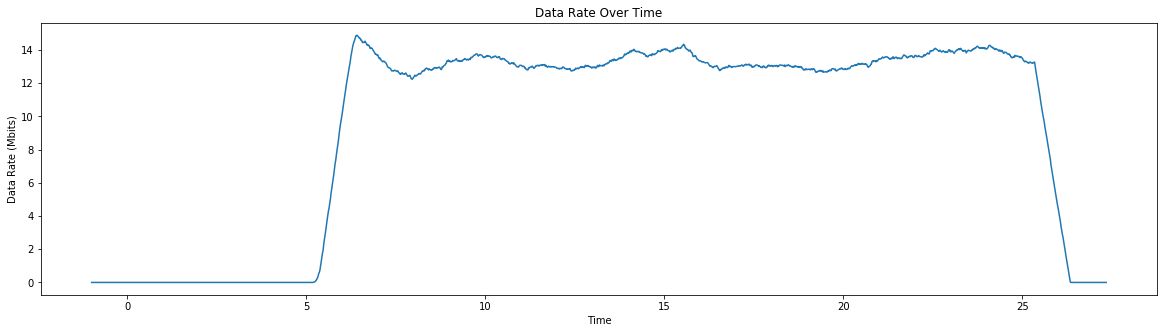

Highest rate: 14.8747


In [44]:
n_steps = 2000  # resolution
padding = 1     # number of seconds to show in the plot before and after the attack 

cur_time = - padding
final_time = attack_df.iloc[120252]['Time'] + 1 + padding
window_size = (final_time - cur_time)/n_steps

time_steps   = []
rates        = []
highest_rate = -1

while cur_time < final_time:
    window_df = attack_df[(cur_time - 1 <= attack_df['Time']) & (attack_df['Time'] <= cur_time)]
    rate      = window_df['Length'].sum() / 1e6

    time_steps.append(cur_time)
    rates.append(rate)

    if rate > highest_rate:
        highest_rate = rate

    cur_time += window_size

# Plotting
plt.figure(figsize=(20, 5))
plt.plot(time_steps, rates)
plt.title("Data Rate Over Time")
plt.ylabel("Data Rate (Mbits)")
plt.xlabel("Time")
plt.show()

print("Highest rate: %.4f" % highest_rate)

We concluded that the highest Mbit rate was 14.8747

## 2.16 - Packet Lenght Distribution

When we plot a pie chart to see the distribution of the packet lengths in the attack, we observed that all the packages in the attack have the same size, 74.

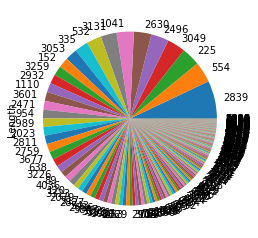

In [45]:
attack_df['Length'].value_counts().plot.pie()

# 3. Conclusion